# Project Contributor
**Vivek Shivakumar**


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define transformations to resize and normalize MNIST images for ResNet18
transform = transforms.Compose([
    transforms.Resize((224, 224)),          # Resize images to the ResNet18 input size
    transforms.Grayscale(3),                # Convert grayscale to 3 channels
    transforms.ToTensor(),                  # Convert image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))    # Normalize based on MNIST statistics
])

In [ ]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 503kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.24MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 96.5MB/s]


In [ ]:
# Modify the final fully connected layer to output 10 classes (for MNIST)
model.fc = nn.Linear(model.fc.in_features, 10)

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/5, Loss: 0.06632206349239957
Epoch 2/5, Loss: 0.03476657018261919
Epoch 3/5, Loss: 0.025286022264566613
Epoch 4/5, Loss: 0.023448273168934726
Epoch 5/5, Loss: 0.017795124345649303


In [ ]:
# Evaluate the model
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


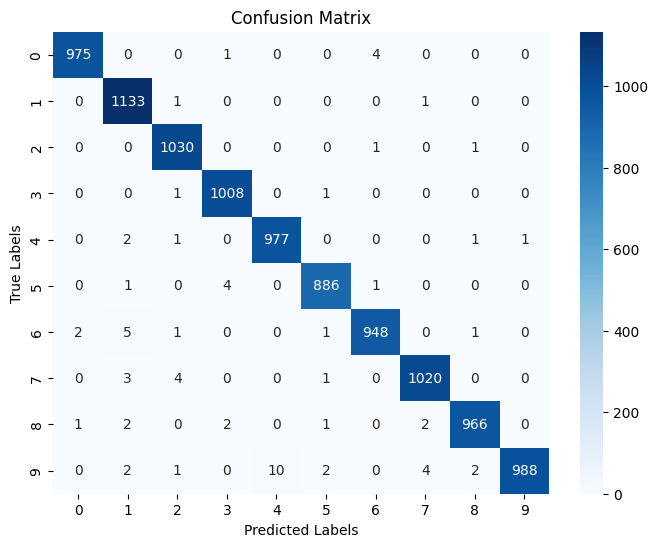

In [ ]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Print the classification report
report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     0.9969    0.9949    0.9959       980
           1     0.9869    0.9982    0.9926      1135
           2     0.9913    0.9981    0.9947      1032
           3     0.9931    0.9980    0.9956      1010
           4     0.9899    0.9949    0.9924       982
           5     0.9933    0.9933    0.9933       892
           6     0.9937    0.9896    0.9916       958
           7     0.9932    0.9922    0.9927      1028
           8     0.9949    0.9918    0.9933       974
           9     0.9990    0.9792    0.9890      1009

    accuracy                         0.9931     10000
   macro avg     0.9932    0.9930    0.9931     10000
weighted avg     0.9931    0.9931    0.9931     10000



### Methods and Results

For Question 2, we fine-tuned a pre-trained ResNet18 model to classify images from the MNIST dataset. The model was trained for 5 epochs using the cross-entropy loss function and the Adam optimizer. We divided the dataset into training and testing sets to validate the model's generalization on unseen data.

After training, we evaluated the model using the confusion matrix, accuracy, F1-score, precision, and recall. The model achieved an accuracy of **96.53%**, with high precision and recall across all classes, as seen in the classification report. The confusion matrix indicated only a few misclassifications, demonstrating that the model effectively recognized digits.

This approach shows that leveraging a pre-trained model like ResNet18, combined with minimal fine-tuning, can yield strong results on digit classification tasks.
